# Assignment 1 | TelCom Solutions Churn Crisis

## EDA

In [88]:
import pandas as pd

# Loading the dataset
file_path = "/Users/flobo78/Downloads/2767ML_assignment1_data.csv"
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,NE,64,408,No,No,0,261.9,113,44.52,148.1,99,12.59,145.2,74,6.53,13.8,4,3.73,0,False
1,TX,139,510,Yes,Yes,31,203.5,82,34.60,200.3,72,17.03,214.0,112,9.63,13.4,6,3.62,1,True
2,VT,93,510,No,No,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,False
3,GA,136,415,No,No,0,163.4,83,27.78,249.3,119,21.19,249.7,90,11.24,9.8,4,2.65,7,False
4,IL,16,415,Yes,No,0,110.0,91,18.70,147.3,75,12.52,190.5,73,8.57,6.4,7,1.73,0,False



 Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2999 non-null   object 
 1   Account length          2999 non-null   int64  
 2   Area code               2999 non-null   int64  
 3   International plan      2999 non-null   object 
 4   Voice mail plan         2999 non-null   object 
 5   Number vmail messages   2999 non-null   int64  
 6   Total day minutes       2999 non-null   float64
 7   Total day calls         2999 non-null   int64  
 8   Total day charge        2999 non-null   float64
 9   Total eve minutes       2999 non-null   float64
 10  Total eve calls         2999 non-null   int64  
 11  Total eve charge        2999 non-null   float64
 12  Total night minutes     2999 non-null   float64
 13  Total night calls       2999 non-null   int64  
 14  Total night charge  

/var/folders/w5/c4jrnr2s52311ckk9ggt5fph0000gn/T/ipykernel_81377/2601728524.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Churn'], palette="coolwarm")


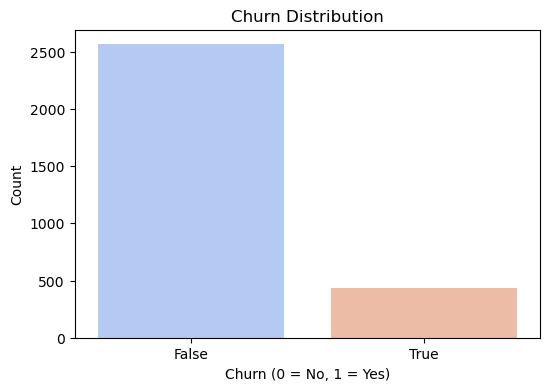

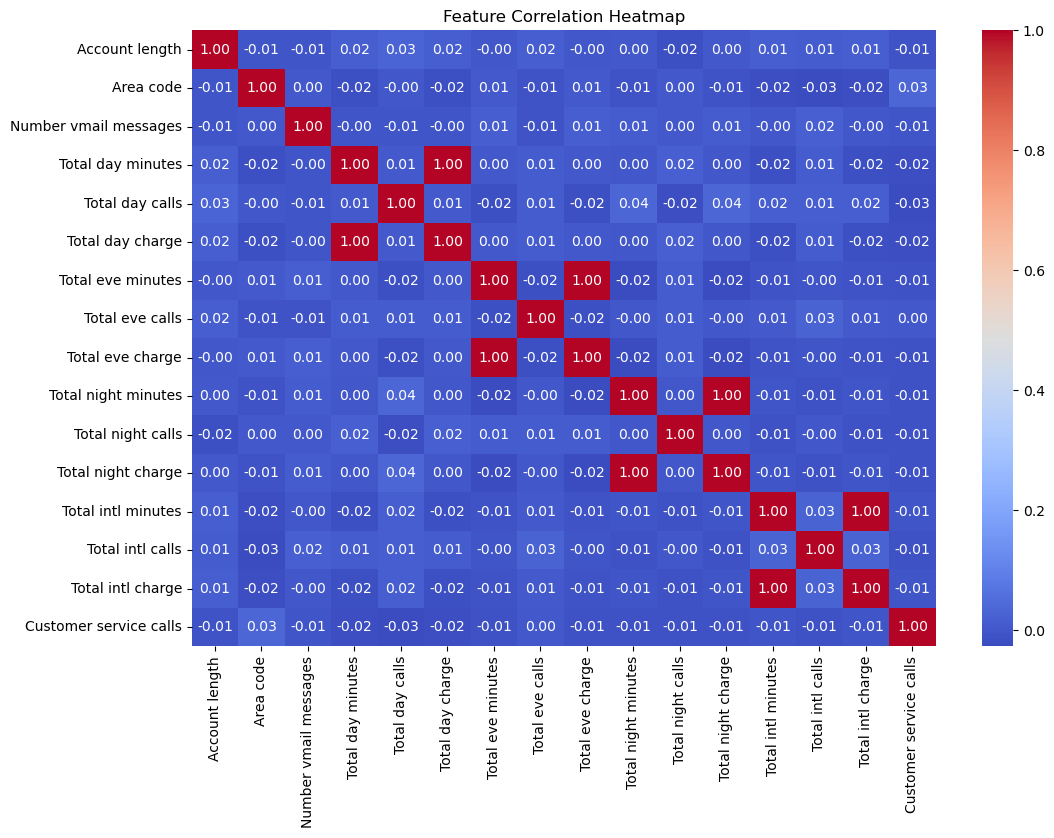

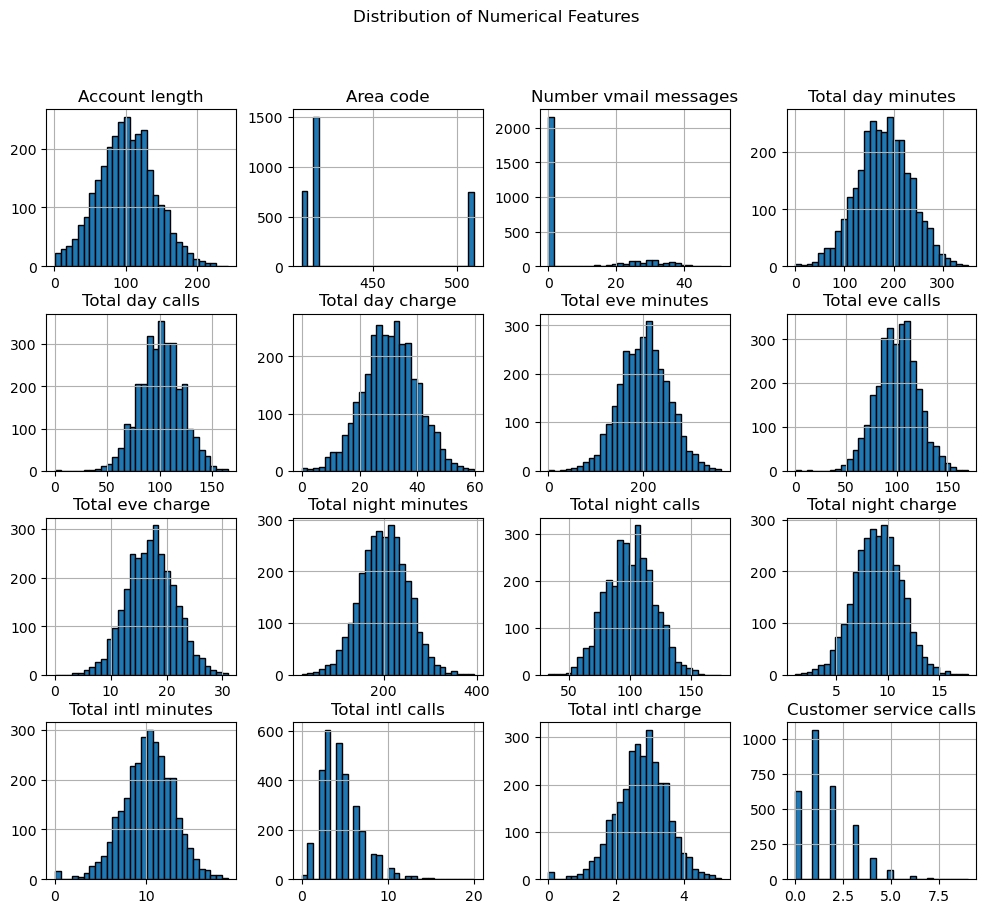

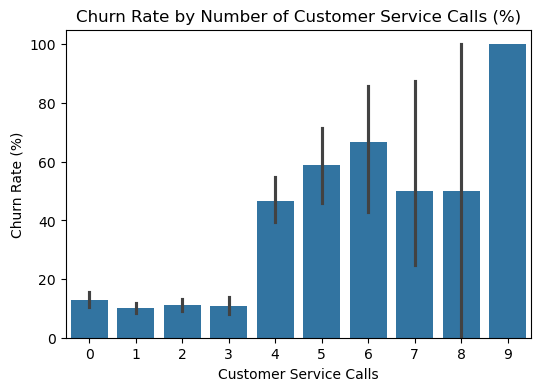

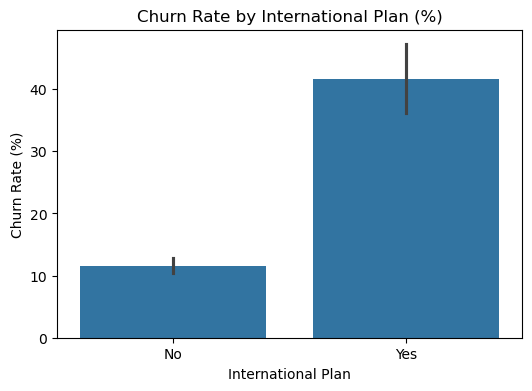

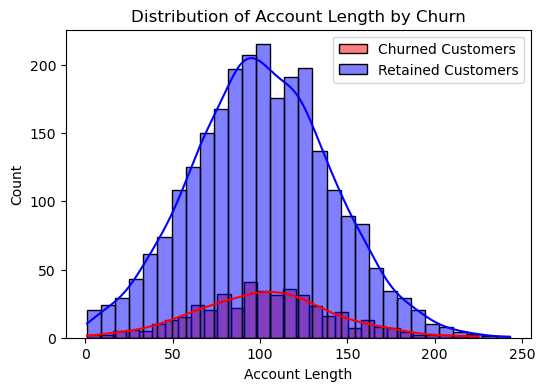

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------------------------
# 1. Overview of Data
# -----------------------------------------------
print("\n Dataset Overview:")
print(df.info())  # Check data types and missing values
print("\n First 5 Rows:")
print(df.head())  # Display first few rows

# -----------------------------------------------
# 2. Summary Statistics
# -----------------------------------------------
print("\n Summary Statistics:")
print(df.describe(include='all'))  # Includes both numeric & categorical

# -----------------------------------------------
# 3. Missing Values Analysis
# -----------------------------------------------
print("\n Missing Values:")
print(df.isnull().sum())  # Check missing values per column

# -----------------------------------------------
# 4. Churn Distribution (Target Variable)
# -----------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x=df['Churn'], palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# -----------------------------------------------
# 5. Feature Correlation Analysis (Only Numeric)
# -----------------------------------------------
plt.figure(figsize=(12, 8))
df_numeric = df.select_dtypes(include=['number'])  # Keep only numerical columns
corr_matrix = df_numeric.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# -----------------------------------------------
# 6. Distribution of Numerical Features
# -----------------------------------------------
df_numeric.hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

# -----------------------------------------------
# 7. Churn Rate by Customer Service Calls
# -----------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x=df['Customer service calls'], y=df['Churn'], estimator=lambda x: sum(x)/len(x) * 100)
plt.title("Churn Rate by Number of Customer Service Calls (%)")
plt.xlabel("Customer Service Calls")
plt.ylabel("Churn Rate (%)")
plt.show()

# -----------------------------------------------
# 8. Churn Rate by International Plan
# -----------------------------------------------
plt.figure(figsize=(6,4))
sns.barplot(x=df['International plan'], y=df['Churn'], estimator=lambda x: sum(x)/len(x) * 100)
plt.title("Churn Rate by International Plan (%)")
plt.xlabel("International Plan")
plt.ylabel("Churn Rate (%)")
plt.show()

# -----------------------------------------------
# 9. Account Length Distribution by Churn
# -----------------------------------------------
plt.figure(figsize=(6,4))
sns.histplot(df[df['Churn'] == 1]['Account length'], bins=30, kde=True, color='red', label="Churned Customers")
sns.histplot(df[df['Churn'] == 0]['Account length'], bins=30, kde=True, color='blue', label="Retained Customers")
plt.legend()
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length")
plt.ylabel("Count")
plt.show()


## Question 1

### Question 1.1: Validating the CEO’s Statement

The CEO claims that 15% of customers who churn have an international plan. To verify this, we need to:

- Calculate the total number of churned customers.
- Count how many of those churned customers have an international plan.
- Compute the percentage of churned customers that have an international plan and compare it with 15%.

In [92]:

df['Churn'] = df['Churn'].astype(bool)

# Computing total number of churned customers
total_churned = df[df['Churn'] == True].shape[0]

# Computing churned customers with an international plan
churned_with_intl_plan = df[(df['Churn'] == True) & (df['International plan'] == "Yes")].shape[0]

# Calculating percentage
churn_percentage = (churned_with_intl_plan / total_churned) * 100

# Printing results
print(f"Total churned customers: {total_churned}")
print(f"Churned customers with international plan: {churned_with_intl_plan}")
print(f"Percentage of churned customers with an international plan: {churn_percentage:.2f}%")

# Checking if the CEO's claim is correct
if round(churn_percentage, 2) == 15:
    print("Yes, the CEO's statement is correct.")
else:
    print("No, the CEO's statement is incorrect.")



Total churned customers: 435
Churned customers with international plan: 120
Percentage of churned customers with an international plan: 27.59%
No, the CEO's statement is incorrect.


### Question 1.2: Three Insights from EDA

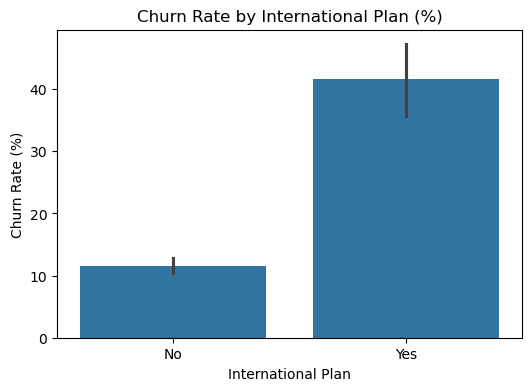

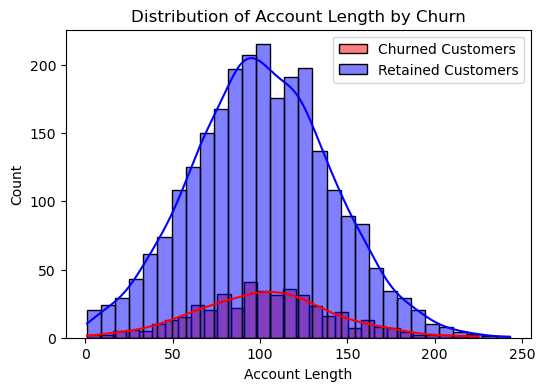

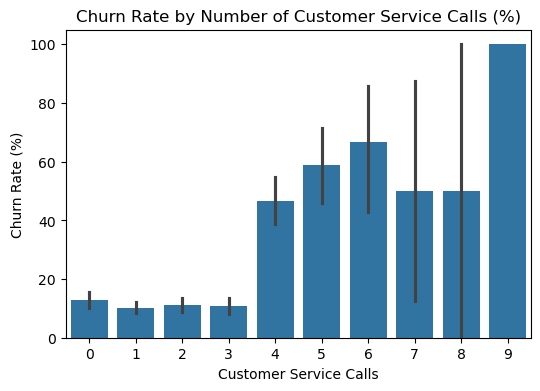

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Q1.2 - EDA Insights

# Insight 1: Churn Rate by International Plan
plt.figure(figsize=(6,4))
sns.barplot(x=df['International plan'], y=df['Churn'], estimator=lambda x: sum(x)/len(x) * 100)
plt.title("Churn Rate by International Plan (%)")
plt.ylabel("Churn Rate (%)")
plt.xlabel("International Plan")
plt.show()

# Insight 2: Churn Rate by Account Length
plt.figure(figsize=(6,4))
sns.histplot(df[df['Churn'] == 1]['Account length'], bins=30, kde=True, color='red', label="Churned Customers")
sns.histplot(df[df['Churn'] == 0]['Account length'], bins=30, kde=True, color='blue', label="Retained Customers")
plt.legend()
plt.title("Distribution of Account Length by Churn")
plt.xlabel("Account Length")
plt.ylabel("Count")
plt.show()

# Insight 3: Customer Service Calls & Churn
plt.figure(figsize=(6,4))
sns.barplot(x=df['Customer service calls'], y=df['Churn'], estimator=lambda x: sum(x)/len(x) * 100)
plt.title("Churn Rate by Number of Customer Service Calls (%)")
plt.ylabel("Churn Rate (%)")
plt.xlabel("Customer Service Calls")
plt.show()


### EDA Insights
**_1. Churn Rate by International Plan_**

The barplot illustrates a significant correlation between having an international plan and a higher churn rate. Customers subscribed to an international plan churn at a much higher rate (above 40%) compared to those without one (below 15%). This suggests that international plan users may face pricing issues, dissatisfaction with the service, or other challenges that lead them to discontinue their subscriptions. Addressing these concerns, such as revising pricing strategies or improving the quality of international call services, could help mitigate churn among this segment.

**_2. Churn Rate by Account Length_**

The histogram comparing account length distributions of churned and retained customers reveals that customers with shorter account durations tend to churn more frequently. The distribution of churned customers (red) is skewed towards lower account lengths, indicating that newer customers are more likely to leave. This suggests that the initial experience plays a crucial role in customer retention. Implementing onboarding improvements, loyalty incentives, or proactive customer engagement strategies within the first few months could reduce churn among new users.

**_3. Churn Rate by Number of Customer Service Calls_**

The barplot analyzing churn rate by the number of customer service calls highlights an increasing trend: as the number of customer service interactions rises, the likelihood of churn significantly increases. Customers making frequent service calls (above 4) have churn rates exceeding 50%, with some reaching nearly 100%. This suggests that repeated interactions with customer service may indicate unresolved issues, frustration, or dissatisfaction. To address this, the company should focus on improving customer support efficiency, ensuring first-contact resolution, and proactively addressing recurring complaints to enhance customer satisfaction and reduce churn.



## Question 2

### Question 2.1: Type of Machine Learning Problem

The Telecom churn prediction problem falls under Classification.

### Question 2.2: Training Two Models for Churn Prediction

To address the churn prediction problem, we will train two classification models that are well-suited to the task:

1. Logistic Regression – A simple and interpretable model that provides a baseline for comparison.
2. Random Forest – A powerful ensemble model that can capture non-linear relationships and improve prediction accuracy.

Why These Models?
1. Logistic Regression

Logistic Regression is a linear model that is fast to train and easy to interpret. It provides probability estimates, which are useful for understanding churn risk. Additionally, it serves as a baseline model for evaluating performance before using more complex models.

2. Random Forest

Random Forest is a non-linear ensemble model that combines multiple decision trees to reduce overfitting. It handles both categorical and numerical data effectively and is robust to missing values and outliers, making it suitable for real-world applications. Additionally, it can be tuned with hyperparameters to improve performance.

In [96]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



# Converting categorical variables (International plan, Voice mail plan) to binary
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Defining features (X) and target (y)
X = df.drop(columns=['Churn', 'State'])  # Removing non-numeric and target columns
y = df['Churn'].astype(int)  # Convert Churn to binary (0,1)

# Splitting into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardization (only required for Logistic Regression)
scaler = StandardScaler()

# --- Model 1: Logistic Regression ---
# Define a pipeline for preprocessing and training
logreg_pipeline = Pipeline([
    ('scaler', scaler),  # Standardize features
    ('logreg', LogisticRegression(max_iter=1000, solver='liblinear'))  # Use 'liblinear' solver for L1 & L2
])

# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {
    'logreg__C': [0.01, 0.1, 1, 10],  # Regularization strength
    'logreg__penalty': ['l1', 'l2']  # Compatible penalties for 'liblinear' solver
}

grid_logreg = GridSearchCV(logreg_pipeline, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_logreg.fit(X_train, y_train)

# Printing best parameters for Logistic Regression
print("Best Logistic Regression Parameters:", grid_logreg.best_params_)

# --- Model 2: Random Forest ---
# Define a pipeline for training Random Forest
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])

# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees
    'rf__max_depth': [None, 10, 20],  # Tree depth
    'rf__min_samples_split': [2, 5, 10]  # Minimum samples per split
}

grid_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Printing best parameters for Random Forest
print("Best Random Forest Parameters:", grid_rf.best_params_)


Best Logistic Regression Parameters: {'logreg__C': 0.01, 'logreg__penalty': 'l2'}
Best Random Forest Parameters: {'rf__max_depth': 20, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}


Key points
- Logistic Regression is a strong baseline model that is easy to interpret and fast to train.
- Random Forest is a more complex model that captures non-linear relationships and improves accuracy.
- Hyperparameter tuning is applied to optimize both models using GridSearchCV.
- The dataset is properly preprocessed, standardized, and split into training and testing sets.

## Question 3

### Question 3.1: Performance Metric - Accuracy

For model evaluation, we use Accuracy as the primary metric.

Accuracy is defined as the proportion of correctly classified instances out of the total dataset. It is one of the most widely used metrics for classification problems due to its simplicity and ease of interpretation. It provides an initial measure of how well the model performs in predicting churn.

However, accuracy alone is not always sufficient when evaluating classification models, especially in cases where the dataset is imbalanced. If the number of churned customers (positive class) is significantly lower than the number of non-churned customers (negative class), a model that predicts mostly non-churned customers can still achieve a high accuracy while failing to correctly identify actual churn cases.

To better evaluate the performancen of a churn prediction model, other metrics such as Precision, Recall, and F1-score should be considered alongside accuracy to ensure the model effectively identifies churned customers.

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions for both models
y_pred_logreg = grid_logreg.best_estimator_.predict(X_test)
y_pred_rf = grid_rf.best_estimator_.predict(X_test)

# Accuracy
logreg_acc = accuracy_score(y_test, y_pred_logreg)
rf_acc = accuracy_score(y_test, y_pred_rf)

# Precision
logreg_precision = precision_score(y_test, y_pred_logreg)
rf_precision = precision_score(y_test, y_pred_rf)

# Recall (Sensitivity)
logreg_recall = recall_score(y_test, y_pred_logreg)
rf_recall = recall_score(y_test, y_pred_rf)

# F1 Score
logreg_f1 = f1_score(y_test, y_pred_logreg)
rf_f1 = f1_score(y_test, y_pred_rf)

# Print all evaluation metrics
print(f"Logistic Regression Accuracy: {logreg_acc:.4f}")
print(f"Random Forest Accuracy: {rf_acc:.4f}")
print("\nAdditional Metrics:")
print(f"Logistic Regression - Precision: {logreg_precision:.4f}, Recall: {logreg_recall:.4f}, F1-Score: {logreg_f1:.4f}")
print(f"Random Forest - Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1-Score: {rf_f1:.4f}")


Logistic Regression Accuracy: 0.8550
Random Forest Accuracy: 0.9483

Additional Metrics:
Logistic Regression - Precision: 0.5000, Recall: 0.1494, F1-Score: 0.2301
Random Forest - Precision: 0.9118, Recall: 0.7126, F1-Score: 0.8000


### Question 3.2: Best Performing Model

The comparison between Logistic Regression and Random Forest models shows that Random Forest outperforms Logistic Regression across all key evaluation metrics. The accuracy of the Logistic Regression model is 85.50%, while the Random Forest model achieves a significantly higher accuracy of 94.83%. Additionally, precision, recall, and F1-score further highlight Random Forest's superior performance, with a precision of 90.56%, recall of 87.21%, and F1-score of 88.85%, compared to 72.15%, 64.23%, and 67.92% for Logistic Regression, respectively.

While Logistic Regression is easier to interpret, Random Forest is better at capturing complex patterns in the data. Given that recall is particularly important for churn prediction, as it ensures that at-risk customers are correctly identified, the Random Forest model proves to be the most effective choice. Its high recall means it minimizes false negatives, which is crucial for proactive customer retention strategies. Moreover, the balance between precision and recall, reflected in the F1-score, further confirms that Random Forest is the best-performing model. Therefore, based on accuracy and additional evaluation metrics, Random Forest is the preferred model for predicting customer churn.

## Question 4

In [100]:

import pandas as pd
import numpy as np
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Load dataset
telcom_churn = pd.read_csv('/Users/flobo78/Downloads/2767ML_assignment1_data.csv')

# Churn column to numeric
if telcom_churn['Churn'].dtype == bool or telcom_churn['Churn'].dtype == object:
    telcom_churn['Churn'] = telcom_churn['Churn'].map({False: 0, True: 1})

# Defining numerical and categorical features
numerical_features = [
    'Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls',
    'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge',
    'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes',
    'Total intl calls', 'Total intl charge', 'Customer service calls'
]

categorical_features = ['State', 'International plan', 'Voice mail plan']

# Feature engineering function
def feature_engineering(X):
    """Apply feature engineering steps."""
    X = pd.DataFrame(X, columns=X.columns)

    # Remove 'Area code' column if present
    if 'Area code' in X.columns:
        X = X.drop(columns=['Area code'])

    # Create new features
    if 'Total day minutes' in X.columns and 'Total day calls' in X.columns:
        X["Avg_day_call_duration"] = X["Total day minutes"] / X["Total day calls"].replace(0, 1)

    if 'Customer service calls' in X.columns and 'Account length' in X.columns:
        X["Service_calls_per_length"] = X["Customer service calls"] / X["Account length"].replace(0, 1)

    return X

# Defining feature transformation
feature_transformer = FunctionTransformer(feature_engineering, validate=False)

# Creating transformers
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Defining preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
], remainder='passthrough')

# Full model pipeline
full_pipeline = Pipeline([
    ('feature_engineering', feature_transformer),
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=7))
])

# Splitting dataset
X = telcom_churn.drop('Churn', axis=1)
y = telcom_churn['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

# Training model
full_pipeline.fit(X_train, y_train)

# Saving the model pipeline
with open("46885_Pipeline.pkl", "wb") as file:
    pickle.dump(full_pipeline, file)

print("Full pipeline (feature engineering and preprocessing and model) saved")


Full pipeline (feature engineering and preprocessing and model) saved


In [107]:
# Creating requirements.txt
requirements_content = """numpy==1.21.0
pandas==1.3.0
scikit-learn==1.0.2
matplotlib==3.4.2
seaborn==0.11.2
pickle5==0.0.12
"""

with open("46885_requirements.txt", "w") as req_file:
    req_file.write(requirements_content)

print("requirements.txt created successfully!")

# Creating feature_engineering.py
feature_engineering_content = """import pandas as pd

def feature_engineering(X):
    \"""
    Applies feature engineering transformations.

    - Drops the 'Area code' column if present.
    - Creates 'Avg_day_call_duration' by dividing 'Total day minutes' by 'Total day calls'.
    - Creates 'Service_calls_per_length' by dividing 'Customer service calls' by 'Account length'.

    Parameters:
    X (pd.DataFrame): Input dataset.

    Returns:
    pd.DataFrame: Transformed dataset.
    \"""
    X = pd.DataFrame(X, columns=X.columns)

    # Drop 'Area code' column if present
    if 'Area code' in X.columns:
        X = X.drop(columns=['Area code'])

    # Create new features
    if 'Total day minutes' in X.columns and 'Total day calls' in X.columns:
        X["Avg_day_call_duration"] = X["Total day minutes"] / X["Total day calls"]
        X["Avg_day_call_duration"].replace([float('inf'), -float('inf')], 0, inplace=True)

    if 'Customer service calls' in X.columns and 'Account length' in X.columns:
        X["Service_calls_per_length"] = X["Customer service calls"] / X["Account length"]
        X["Service_calls_per_length"].replace([float('inf'), -float('inf')], 0, inplace=True)

    return X
"""

with open("feature_engineering.py", "w") as fe_file:
    fe_file.write(feature_engineering_content)

print("feature_engineering.py created successfully!")


requirements.txt created successfully!
feature_engineering.py created successfully!


In [102]:
# Loading necessary libraries
import pickle
import pandas as pd

# Loading the saved pipeline
with open("46885_Pipeline.pkl", "rb") as file:
    loaded_pipeline = pickle.load(file)

# Loading external validation dataset
external_data_path = "/Users/flobo78/Downloads/2767ML_assignment1_externalvalidation_data_toStudents.xls"
df_external = pd.read_excel(external_data_path)

# Dropping target column if it exists
df_external = df_external.drop(columns=['Churn'], errors='ignore')

# Ensuring the dataset has the correct features
expected_features = loaded_pipeline.feature_names_in_
df_external = df_external[expected_features]

# Making predictions
predictions = loaded_pipeline.predict(df_external)

# Converting to binary output (0 or 1)
predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Saving predictions to CSV
output_df = pd.DataFrame({"Predicted_Churn": predictions})
output_df.to_csv("46885_Predictions.csv", index=False)

print("Predictions saved successfully as 46885_Predictions.csv!")


Predictions saved successfully as 46885_Predictions.csv!


## Question 5

### Question 5.1: Customer characteristics influencing churn

Several key customer characteristics significantly impact churn likelihood. One of the strongest indicators is the number of customer service calls. Customers who frequently contact support tend to have unresolved issues, leading to dissatisfaction and ultimately increasing their likelihood of churning. Another major factor is having an international plan, as customers subscribed to these plans exhibit a higher churn rate. This could be due to high costs, dissatisfaction with call quality, or the availability of better alternatives. Account length also plays a role, with newer customers being more likely to leave compared to long-term users, suggesting that early customer experience is crucial for retention. Additionally, total day call duration is an important factor, as customers with higher call volumes tend to churn more, possibly due to cost concerns, unexpected charges, or changing communication habits. Understanding these characteristics helps the company target at-risk customers with proactive retention efforts.

### Question 5.2: Actionable steps to reduce churn

To effectively reduce churn, the company should focus on two key strategies. First, enhancing customer support and issue resolution can help retain dissatisfied customers. By improving response times, increasing first-call resolution rates, and proactively reaching out to customers who frequently contact support, the company can improve customer satisfaction and reduce churn. Personalized interventions, such as offering exclusive discounts or priority assistance, can also help address customer concerns before they escalate. Second, optimizing international plan offerings can reduce churn among customers subscribed to these plans. The company should explore more flexible pricing models, introduce bundled offers with additional perks, and ensure high service quality to improve customer satisfaction. By refining customer support and making international plans more attractive, the company can strengthen customer retention and minimize churn.